In [3]:
import pandas as pd
import numpy as np

In [4]:
# Read dataset
data=pd.read_csv('data/thyroid_data.csv')

In [5]:
data.head(10)

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
5,5,18,F,t,f,f,f,f,f,f,...,0.03,f,?,t,183,t,1.3,t,141,negative
6,6,59,F,f,f,f,f,f,f,f,...,?,f,?,t,72,t,0.92,t,78,negative
7,7,80,F,f,f,f,f,f,f,f,...,2.2,t,0.6,t,80,t,0.7,t,115,negative
8,8,66,F,f,f,f,f,f,f,f,...,0.6,t,2.2,t,123,t,0.93,t,132,negative
9,9,68,M,f,f,f,f,f,f,f,...,2.4,t,1.6,t,83,t,0.89,t,93,negative


In [6]:
data.columns


Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [7]:
# To check for the null values
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [8]:
#Remove unwanted columns
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [9]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [10]:
data.describe()

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
count,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,94,3,2,2,2,2,2,264,65,218,139,210,4
top,59,F,f,f,f,f,f,?,?,?,?,?,negative
freq,91,2108,3080,3175,3180,3194,3130,247,589,142,276,274,2753


In [11]:
data.shape

(3221, 13)

In [12]:
# replace ? with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [13]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


In [14]:
# Check for unique values
for column in data.columns:
    print(column,(data[column].unique()))

Age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [15]:
# handling missing values
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)
data['Sex'].fillna((data['Sex'].mode()), inplace=True)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4628\4072402335.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4628\4072402335.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_462

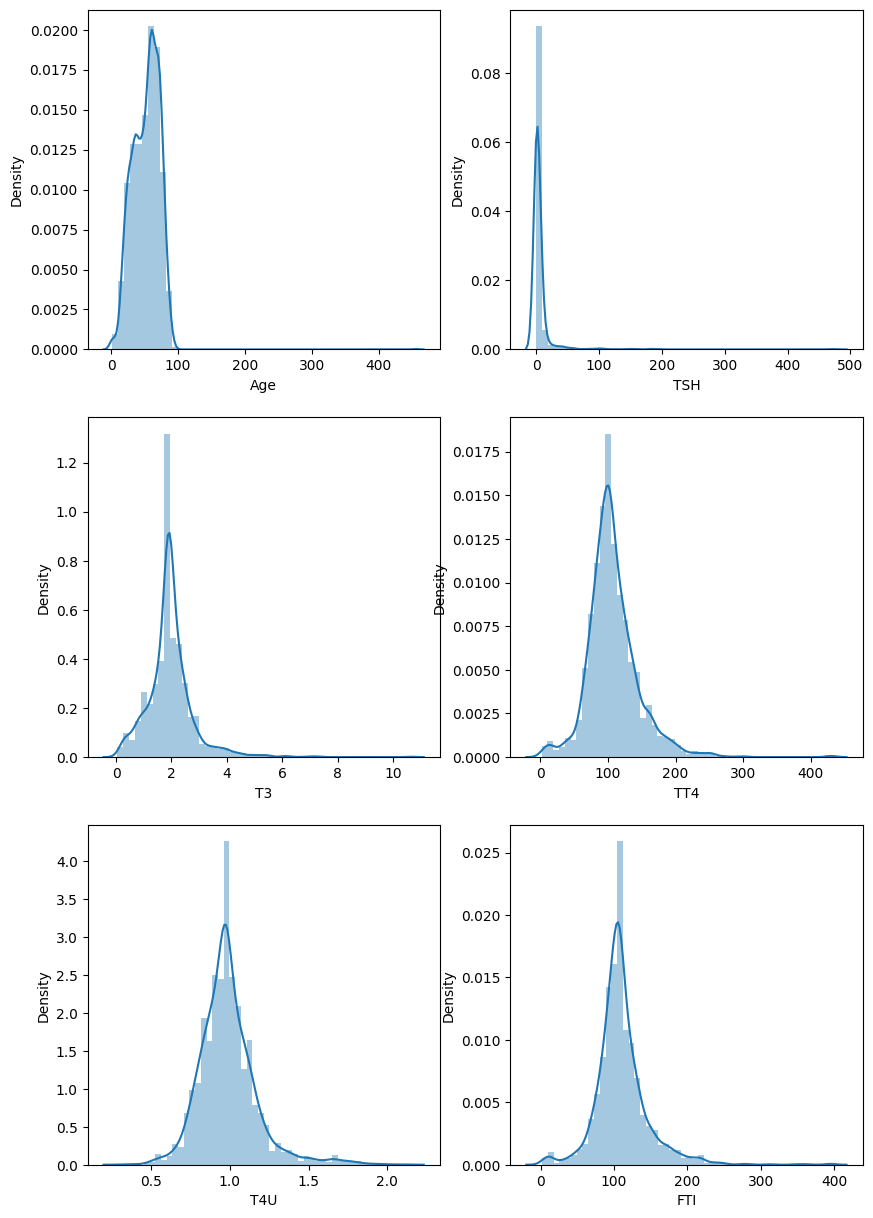

In [17]:
columns = ['Age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [18]:
data.describe()

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
count,3221,3094,3221,3221,3221,3221,3221,3221.0,3221.0,3221.0,3221.00,3221.0,3221
unique,94,2,2,2,2,2,2,264.0,65.0,218.0,139.00,210.0,4
top,59,F,f,f,f,f,f,1.5,1.9,102.0,0.97,106.0,negative
freq,91,2108,3080,3175,3180,3194,3130,247.0,589.0,142.0,276.00,274.0,2753


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              3221 non-null   object
 1   Sex              3094 non-null   object
 2   Sick             3221 non-null   object
 3   Pregnant         3221 non-null   object
 4   Thyroid Surgery  3221 non-null   object
 5   Goitre           3221 non-null   object
 6   Tumor            3221 non-null   object
 7   TSH              3221 non-null   object
 8   T3               3221 non-null   object
 9   TT4              3221 non-null   object
 10  T4U              3221 non-null   object
 11  FTI              3221 non-null   object
 12  Category         3221 non-null   object
dtypes: object(13)
memory usage: 327.3+ KB


In [20]:
# the graph TSH is heavily skewed towards left . so we drop it
data=data.drop(['TSH'], axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
data['Category']=lblEn.fit_transform(data['Category'])

<Axes: xlabel='Category', ylabel='count'>

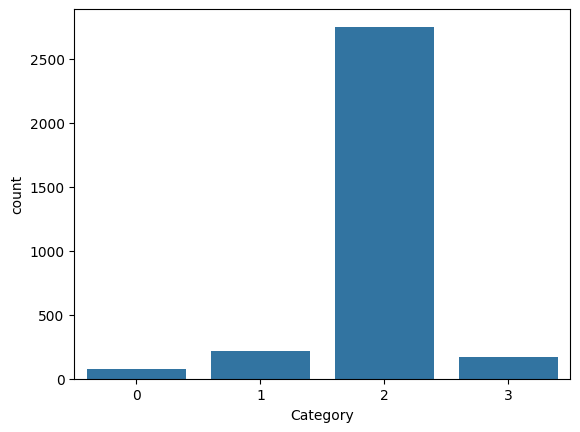

In [22]:
sns.countplot(x='Category',data=data)

In [ ]:
# data set is highly imbalanced

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.utils import resample

In [24]:
X=data.drop(['Category'],axis=1)
y=data.Category

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


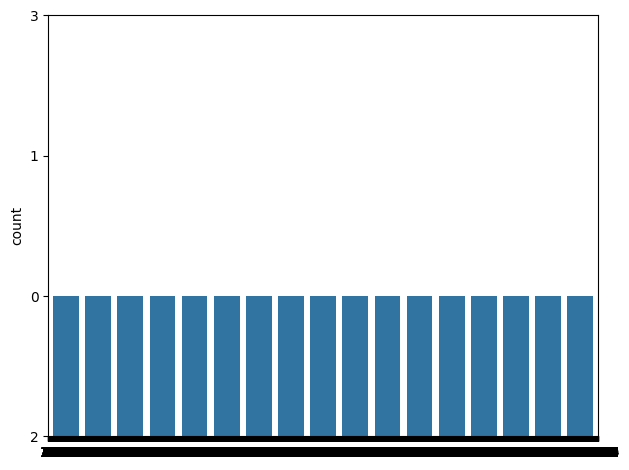

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [39]:
# To balance the dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)
X_sampled



sns.countplot(y_sampled)



plt.show()

X_sampled.columns



In [35]:
y_sampled.unique()

array([2, 0, 1, 3])